In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score ,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from statistics import mean 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

In [7]:
dataset = pd.read_csv('heart2.csv') 

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.072093,0.465497,1.030915,17.518817,51.773637,0.355805,0.525280,22.879921,0.469277,1.159796,0.615547,1.021480,0.611602,0.498285
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


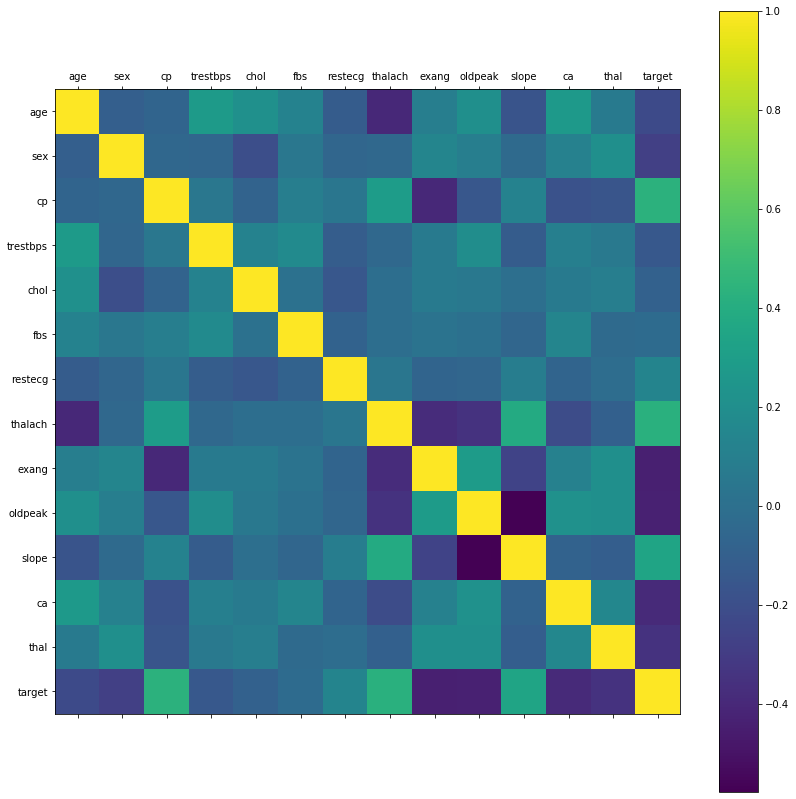

In [9]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010DCCA142B0>,
      dtype=object)

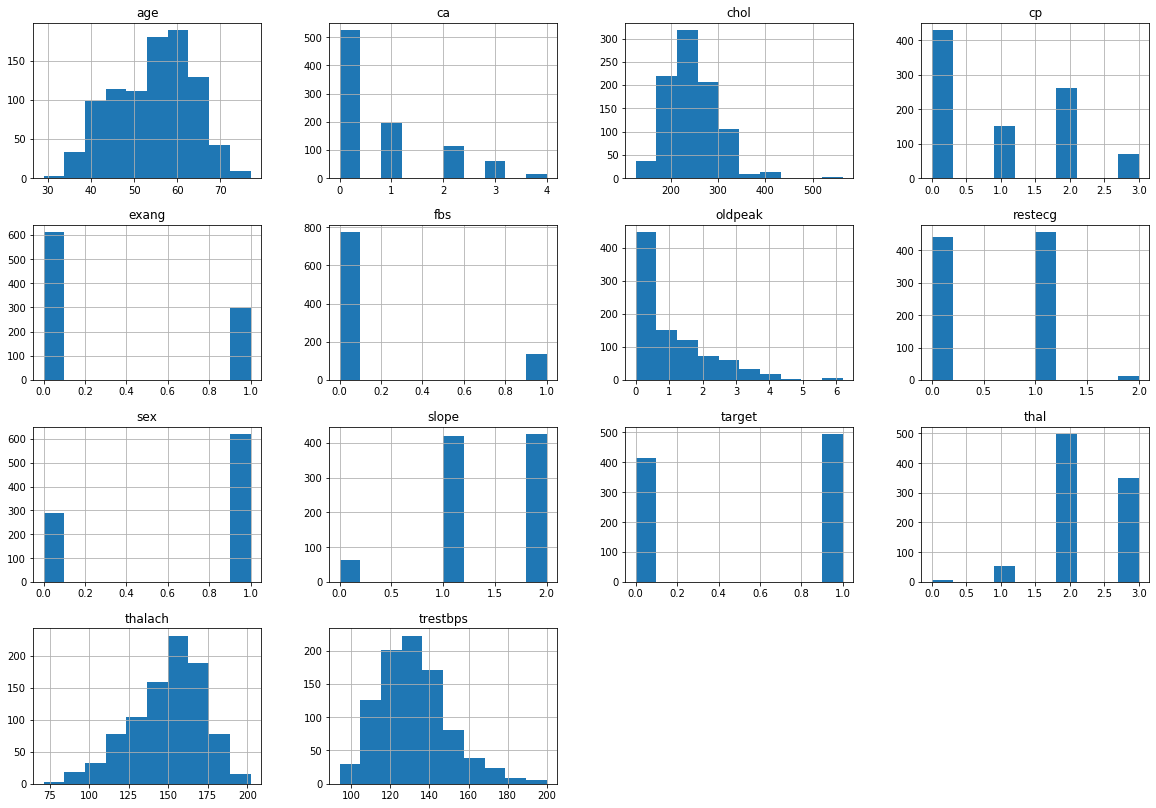

In [10]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

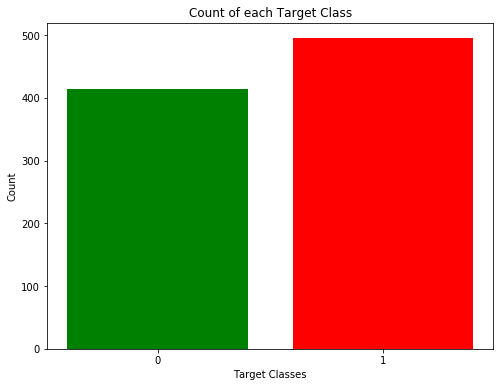

In [11]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [12]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [13]:
Scaler = StandardScaler()
columns_to_scale = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = Scaler.fit_transform(dataset[columns_to_scale])

In [14]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,9.090000e+02,9.090000e+02,9.090000e+02,9.090000e+02,9.090000e+02,909.000000,909.000000,909.000000,909.000000,909.000000,...,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,5.068675e-17,-7.228663e-16,-9.529720e-17,-5.173713e-16,-3.235402e-16,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,0.498285,0.465497,0.465497,0.499487,0.371400,...,0.499291,0.494220,0.410716,0.331368,0.248430,0.127465,0.081020,0.236513,0.497979,0.487131
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.124246e-01,-6.638668e-01,-6.814943e-01,-7.279758e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.553365e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state = 0)

In [16]:
classifier = LogisticRegression(C=1,tol=0.001,random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = classifier.predict(X_test) 

In [18]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100) 
cm_log = confusion_matrix(y_test, y_pred)
cm_log
   

Accuracy :  82.92682926829268


array([[59, 16],
       [12, 77]], dtype=int64)

In [19]:
recall_log = cm_log[0][0]/(cm_log[0][0] + cm_log[0][1])
precision_log= cm_log[0][0]/(cm_log[0][0]+cm_log[1][0])
fmeasure_log=(2*recall_log*precision_log)/(recall_log+precision_log)
recall_log,precision_log,fmeasure_log

(0.7866666666666666, 0.8309859154929577, 0.8082191780821917)

In [20]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
y_pred = gnb.predict(X_test) 

In [22]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100) 
cm_nb = confusion_matrix(y_test, y_pred)
cm_nb
  

Accuracy :  81.09756097560977


array([[58, 17],
       [14, 75]], dtype=int64)

In [23]:
recall_nb = cm_nb[0][0]/(cm_nb[0][0] + cm_nb[0][1])
precision_nb= cm_nb[0][0]/(cm_nb[0][0]+cm_nb[1][0])
fmeasure_nb=(2*recall_nb*precision_nb)/(recall_nb+precision_nb)
recall_nb,precision_nb,fmeasure_nb

(0.7733333333333333, 0.8055555555555556, 0.7891156462585034)

In [24]:
ridgeReg = Ridge(alpha=1, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

In [25]:
print ("Accuracy : ", accuracy_score(y_test, pred)*100) 
print(ridgeReg.score(X_test,y_test))
cm_ridge = confusion_matrix(y_test, pred)
cm_ridge

Accuracy :  81.70731707317073
0.4871877227396203


array([[58, 17],
       [13, 76]], dtype=int64)

In [26]:
recall_ridge = cm_ridge[0][0]/(cm_ridge[0][0] + cm_ridge[0][1])
precision_ridge = cm_ridge[0][0]/(cm_ridge[0][0]+cm_ridge[1][0])
fmeasure_ridge=(2*recall_ridge*precision_ridge)/(recall_ridge+precision_ridge)
recall_ridge,precision_ridge,fmeasure_ridge

(0.7733333333333333, 0.8169014084507042, 0.7945205479452055)

In [27]:
lassoReg = Lasso(alpha=0.001, normalize=True)

lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

In [28]:
print ("Accuracy : ", accuracy_score(y_test, pred)*100) 
print(lassoReg.score(X_test,y_test))
cm_Lasso = confusion_matrix(y_test, pred)
cm_Lasso

Accuracy :  82.92682926829268
0.4912218468388671


array([[58, 17],
       [11, 78]], dtype=int64)

In [29]:
recall_Lasso = cm_Lasso[0][0]/(cm_Lasso[0][0] + cm_Lasso[0][1])
precision_Lasso = cm_Lasso[0][0]/(cm_Lasso[0][0]+cm_Lasso[1][0])
fmeasure_Lasso=(2*recall_Lasso*precision_Lasso)/(recall_Lasso+precision_Lasso)
recall_Lasso,precision_Lasso,fmeasure_Lasso

(0.7733333333333333, 0.8405797101449275, 0.8055555555555556)

In [30]:
lreg = LinearRegression()

In [31]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
pred = lreg.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

In [33]:
print ("Accuracy : ", accuracy_score(y_test, pred)*100) 
print(lreg.score(X_test,y_test))
cm_LR = confusion_matrix(y_test, pred)
cm_LR

Accuracy :  83.53658536585365
0.4903649554214184


array([[58, 17],
       [10, 79]], dtype=int64)

In [34]:
recall_LR = cm_LR[0][0]/(cm_LR[0][0] + cm_LR[0][1])
precision_LR = cm_LR[0][0]/(cm_LR[0][0]+cm_LR[1][0])
fmeasure_LR=(2*recall_LR*precision_LR)/(recall_LR+precision_LR)
recall_LR,precision_LR,fmeasure_LR

(0.7733333333333333, 0.8529411764705882, 0.8111888111888111)

In [35]:
ann_clf = MLPClassifier()

parameters = {'solver': ['lbfgs'],'alpha':[1e-4],'hidden_layer_sizes':([11]),'random_state': [1]}

In [36]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)


ann_clf = grid_obj.best_estimator_

In [37]:
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=11, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
pred = ann_clf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, pred)
cm_ann



array([[72,  3],
       [ 0, 89]], dtype=int64)

In [40]:
ann_result = accuracy_score(y_test,pred)
ann_result

0.9817073170731707

In [41]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][0])
fmeasure_ann=(2*recall_ann*precision_ann)/(recall_ann+precision_ann)
recall_ann,precision_ann,fmeasure_ann

(0.96, 1.0, 0.9795918367346939)

1 0.8292682926829268
2 0.8353658536585366
3 0.9024390243902439
4 0.8719512195121951
5 0.975609756097561
6 0.9512195121951219
7 0.9451219512195121
8 0.9451219512195121
9 0.9634146341463414
10 0.9512195121951219
11 0.9817073170731707
12 0.9634146341463414
13 0.9634146341463414


Text(0.5, 1.0, 'MLP Classifier scores for different K values')

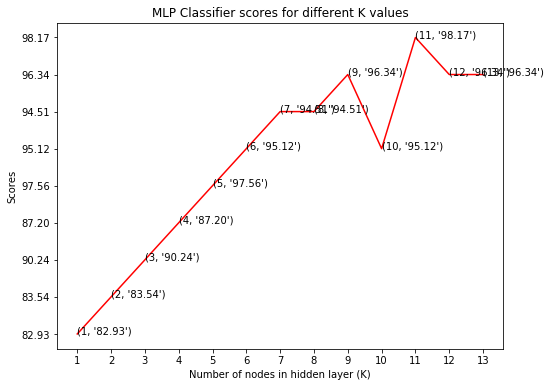

In [42]:
scores = []
for k in range(1,14):
              classifier = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=k, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
              classifier.fit(X_train, y_train)
              pred=classifier.predict(X_test)
              scores.append('%.2f'%(100*accuracy_score(y_test,pred)))
              print(k,accuracy_score(y_test,pred))
    
plt.plot([k for k in range(1, 14)], scores, color = 'red')
for i in range(1,14):
    plt.text(i,scores[i-1], (i, scores[i-1]))
plt.xticks([i for i in range(1, 14)])
plt.xlabel('Number of nodes in hidden layer (K)')
plt.ylabel('Scores')
plt.title('MLP Classifier scores for different K values')
